### Analysis

1. The cities closer to the equater are going to be hotter, and they are also are higher in humidity.

2. A few of of the cities near the equater have very high wind speed, over 15 mph, while most of the cities further away are under 10 mph. 

3. Cloudiness appears to vary greatly, although cities very near the equater appear to have a very high chance of clouds.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setup url and query_url for api pulls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set variable for datetime for date input in graph titles
now = datetime.now()

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_no_cities = len(cities)
total_no_cities

615

In [5]:
# Create lists for data pulled from api request that can later be placed in a dataframe
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set variables to starting values before loop. Chose -1 for city number because homework example shows each set starting at 0
city_number = -1
set_counter = 1

# Perform a weather check on each city using a series of successive API calls.
for city in cities:
    response = requests.get(query_url + city).json()
    city_number += 1
    try:
    # Include a print log of each city as it's being processed (with the city number and city name). 
        print(f"Processing Record {city_number} of Set {set_counter} | {(response['name'])}")
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if city_number >= 50:
            city_number = -1
            set_counter = set_counter + 1
    # If city is not found print line showing it is being skipped           
    except:
        print(f"City not found. Skipping...")
        pass
# Print when data retrival is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 0 of Set 1 | Cabo San Lucas
Processing Record 1 of Set 1 | Katsuura
Processing Record 2 of Set 1 | Codrington
Processing Record 3 of Set 1 | New Norfolk
Processing Record 4 of Set 1 | Bredasdorp
City not found. Skipping...
Processing Record 6 of Set 1 | Carnarvon
Processing Record 7 of Set 1 | Nhulunbuy
Processing Record 8 of Set 1 | Kiruna
Processing Record 9 of Set 1 | Pangnirtung
Processing Record 10 of Set 1 | Khanbari
Processing Record 11 of Set 1 | Longyearbyen
Processing Record 12 of Set 1 | Ushuaia
Processing Record 13 of Set 1 | Mataura
Processing Record 14 of Set 1 | Virginia Beach
Processing Record 15 of Set 1 | Salalah
Processing Record 16 of Set 1 | Nago
Processing Record 17 of Set 1 | Samarai
Processing Record 18 of Set 1 | Atuona
Processing Record 19 of Set 1 | Bridgetown
Processing Record 20 of Set 1 | Nioro
Processing Record 21 of Set 1 | Ilulissat
Processing Record 22 of Set 1 | Dunedin
Processing Record 23 of Set 1 | Nouadhibou
Processing Record 24 

Processing Record 49 of Set 4 | Gaoual
Processing Record 50 of Set 4 | Naze
Processing Record 0 of Set 5 | Meulaboh
City not found. Skipping...
Processing Record 2 of Set 5 | Kibala
Processing Record 3 of Set 5 | Lichuan
Processing Record 4 of Set 5 | Belize
Processing Record 5 of Set 5 | Altay
Processing Record 6 of Set 5 | Vievis
Processing Record 7 of Set 5 | Dalvik
Processing Record 8 of Set 5 | Hauterive
Processing Record 9 of Set 5 | Kuah
Processing Record 10 of Set 5 | Airai
Processing Record 11 of Set 5 | Diu
Processing Record 12 of Set 5 | Ankazoabo
Processing Record 13 of Set 5 | Juazeiro
Processing Record 14 of Set 5 | Nome
Processing Record 15 of Set 5 | Heihe
City not found. Skipping...
Processing Record 17 of Set 5 | Bambanglipuro
City not found. Skipping...
Processing Record 19 of Set 5 | Mattawa
City not found. Skipping...
Processing Record 21 of Set 5 | Lüderitz
Processing Record 22 of Set 5 | Kruisfontein
Processing Record 23 of Set 5 | Avarua
Processing Record 24 of 

Processing Record 1 of Set 9 | Severobaykal'sk
Processing Record 2 of Set 9 | Kaka
Processing Record 3 of Set 9 | Landerneau
Processing Record 4 of Set 9 | Namatanai
Processing Record 5 of Set 9 | Necşeşti
Processing Record 6 of Set 9 | Ballina
Processing Record 7 of Set 9 | Coyhaique
Processing Record 8 of Set 9 | Talovaya
Processing Record 9 of Set 9 | Yumaguzino
City not found. Skipping...
Processing Record 11 of Set 9 | Yulara
City not found. Skipping...
Processing Record 13 of Set 9 | Shāhgarh
Processing Record 14 of Set 9 | Chui
Processing Record 15 of Set 9 | Sitka
Processing Record 16 of Set 9 | Ngaoundéré
Processing Record 17 of Set 9 | Jacqueville
Processing Record 18 of Set 9 | Fukuechō
Processing Record 19 of Set 9 | Ketchikan
Processing Record 20 of Set 9 | Mount Isa
Processing Record 21 of Set 9 | Sydney
Processing Record 22 of Set 9 | Hamilton
Processing Record 23 of Set 9 | Chapleau
Processing Record 24 of Set 9 | Spornoye
Processing Record 25 of Set 9 | Flinders
Proces

Processing Record 47 of Set 12 | Luganville
Processing Record 48 of Set 12 | Te Anau
Processing Record 49 of Set 12 | Praia
Processing Record 50 of Set 12 | Hailar
Processing Record 0 of Set 13 | Bermejo
Processing Record 1 of Set 13 | Hobyo
-----------------------------
Data Retrieval Complete
-----------------------------


In [6]:
# Create dataframe
weather_df = pd.DataFrame({'City_ID': city_id, 'City': city_name, 'Cloudiness': cloudiness,
                'Country': country, 'Date': date, 'Humidity': humidity, 'Lat': lat, 'Lon': lng,
                'Max Temp': max_temp, 'Wind Speed': wind_speed})

# Display the DataFrame
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,3985710,Cabo San Lucas,20,MX,1596402470,52,22.89,-109.91,91.40,13.87
1,2112309,Katsuura,75,JP,1596402470,94,35.13,140.30,75.20,5.82
2,2171099,Codrington,14,AU,1596402471,87,-38.27,141.97,42.66,10.54
3,2155415,New Norfolk,78,AU,1596402471,82,-42.78,147.06,44.01,1.01
4,1015776,Bredasdorp,0,ZA,1596402471,93,-34.53,20.04,48.20,4.70


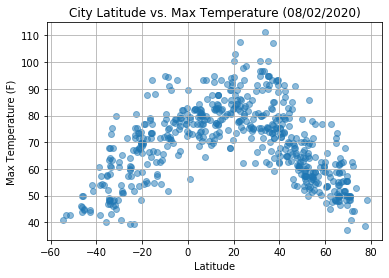

In [7]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Max Temperature ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

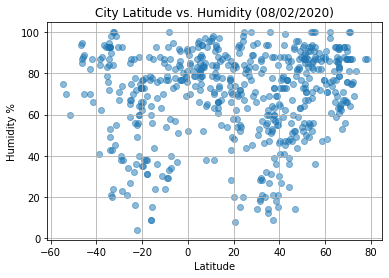

In [8]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Humidity ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

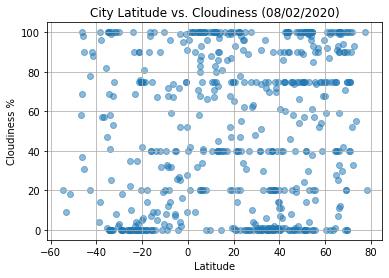

In [9]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Cloudiness ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

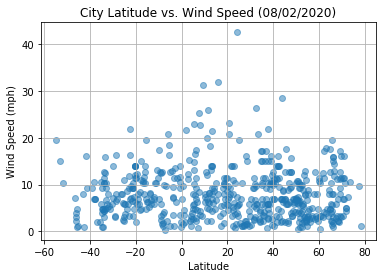

In [10]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=0.5)

# Add titles
plt.title(f'City Latitude vs. Wind Speed ({now.strftime("%m/%d/%Y")})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Show plot with grid
plt.grid(True)
plt.show()

In [11]:
# Create separate dataframes for Northern and Southern hemispheres
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: -0.6983177621075302


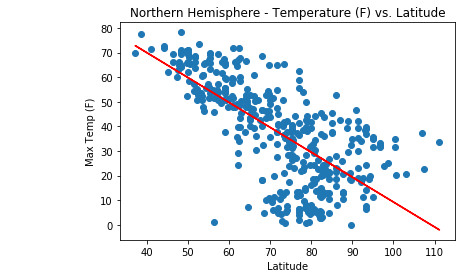

In [20]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Max Temp and Latitude for the Northern Hemisphere
northern_temp_correlation = round(st.pearsonr(northern_hemisphere['Max Temp'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.7251335764470769


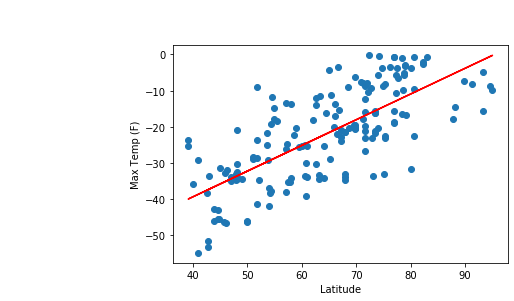

In [13]:
# Southern Hemisphere - Temperature (F) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Max Temp and Latitude for the Southern Hemisphere
sourthern_temp_correlation = round(st.pearsonr(southern_hemisphere['Max Temp'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Max Temp']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Temperature (F) vs. Latitude')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.04626444157684447


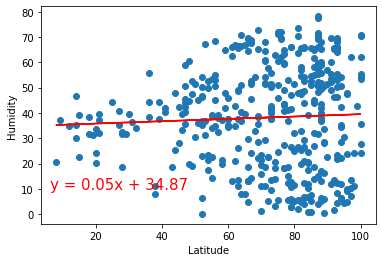

In [14]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Humidity and Latitude for the Northern Hemisphere
northern_humid_correlation = round(st.pearsonr(northern_hemisphere['Humidity'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Humidity']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.08883301085381827


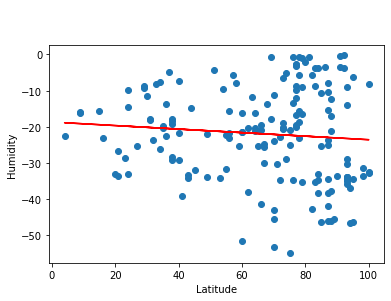

In [15]:
# Southern Hemisphere - Humidity (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Humidity and Latitude for the Southern Hemisphere
sourthern_humid_correlation = round(st.pearsonr(southern_hemisphere['Humidity'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Humidity']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.008729490062058726


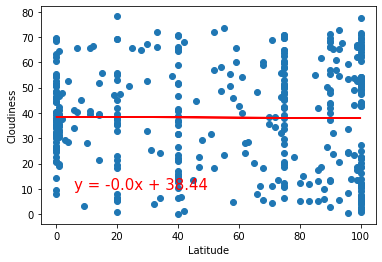

In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Cloudiness and Latitude for the Northern Hemisphere
northern_cloud_correlation = round(st.pearsonr(northern_hemisphere['Cloudiness'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Cloudiness']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.0626238233844437


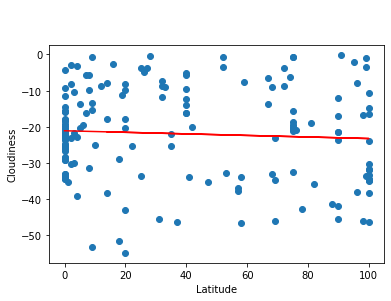

In [17]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Cloudiness and Latitude for the Southern Hemisphere
sourthern_cloud_correlation = round(st.pearsonr(southern_hemisphere['Cloudiness'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Cloudiness']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.10943711589093837


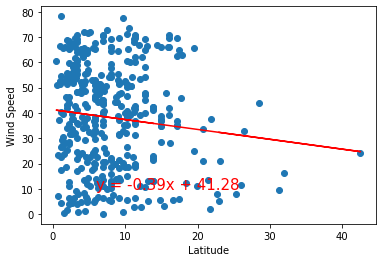

In [18]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Wind Speed and Latitude for the Northern Hemisphere
northern_wind_correlation = round(st.pearsonr(northern_hemisphere['Wind Speed'],northern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = northern_hemisphere['Wind Speed']
y_values = northern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.09548701437676836


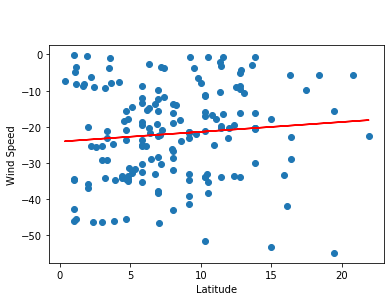

In [19]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
# Calculate the correlation coefficient and linear regression model for Wind Speed and Latitude for the Southern Hemisphere
sourthern_wind_correlation = round(st.pearsonr(southern_hemisphere['Wind Speed'],southern_hemisphere['Lat'])[0],2)

# Set variable for x and y values
x_values = southern_hemisphere['Wind Speed']
y_values = southern_hemisphere['Lat']

# Find and calculate values for regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add titles
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Plot values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print correlation and show plot
print(f"The r-squared is: {rvalue}")
plt.show()